<a href="https://colab.research.google.com/github/tathagatanandy/networktraffic/blob/main/NON_PCA_Application_flow_data_kmeans_fuzzy_db.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Default title text
import pandas as pd

In [ ]:
ls

sample_data/


In [ ]:
pwd

'/content'

In [ ]:
## If you are using the data by mounting the google drive, use the following : If not using Google drive , please comment this
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd

# Import the os module
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Change the current working directory
os.chdir('/content/gdrive/MyDrive/upgrad-assignment/MSLJMU')

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))


Current working directory: /content
Current working directory: /content/gdrive/MyDrive/upgrad-assignment/MSLJMU


In [ ]:
data= pd.read_csv("App-data-87.csv")
data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,10.200.7.5,3128,192.168.90.114,59240,6,27/04/201711:34:51,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,10.200.7.5,3128,192.168.42.57,62632,6,27/04/201711:33:43,74700026,12,1,...,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,BENIGN,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,10.200.7.5,3128,192.168.90.70,52166,6,27/04/201711:32:47,76789744,19,2,...,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,BENIGN,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,10.200.7.5,3128,192.168.180.14,34478,6,27/04/201711:35:00,535002,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP


In [ ]:
## Lets analyze the flow data
for col in data.columns:
    print(col)

Flow.ID
Source.IP
Source.Port
Destination.IP
Destination.Port
Protocol
Timestamp
Flow.Duration
Total.Fwd.Packets
Total.Backward.Packets
Total.Length.of.Fwd.Packets
Total.Length.of.Bwd.Packets
Fwd.Packet.Length.Max
Fwd.Packet.Length.Min
Fwd.Packet.Length.Mean
Fwd.Packet.Length.Std
Bwd.Packet.Length.Max
Bwd.Packet.Length.Min
Bwd.Packet.Length.Mean
Bwd.Packet.Length.Std
Flow.Bytes.s
Flow.Packets.s
Flow.IAT.Mean
Flow.IAT.Std
Flow.IAT.Max
Flow.IAT.Min
Fwd.IAT.Total
Fwd.IAT.Mean
Fwd.IAT.Std
Fwd.IAT.Max
Fwd.IAT.Min
Bwd.IAT.Total
Bwd.IAT.Mean
Bwd.IAT.Std
Bwd.IAT.Max
Bwd.IAT.Min
Fwd.PSH.Flags
Bwd.PSH.Flags
Fwd.URG.Flags
Bwd.URG.Flags
Fwd.Header.Length
Bwd.Header.Length
Fwd.Packets.s
Bwd.Packets.s
Min.Packet.Length
Max.Packet.Length
Packet.Length.Mean
Packet.Length.Std
Packet.Length.Variance
FIN.Flag.Count
SYN.Flag.Count
RST.Flag.Count
PSH.Flag.Count
ACK.Flag.Count
URG.Flag.Count
CWE.Flag.Count
ECE.Flag.Count
Down.Up.Ratio
Average.Packet.Size
Avg.Fwd.Segment.Size
Avg.Bwd.Segment.Size
Fwd.Header.

In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)

1.2.2


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [ ]:
 data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,10.200.7.5,3128,192.168.90.114,59240,6,27/04/201711:34:51,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,10.200.7.5,3128,192.168.42.57,62632,6,27/04/201711:33:43,74700026,12,1,...,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,BENIGN,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,10.200.7.5,3128,192.168.90.70,52166,6,27/04/201711:32:47,76789744,19,2,...,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,BENIGN,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,10.200.7.5,3128,192.168.180.14,34478,6,27/04/201711:35:00,535002,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP


In [ ]:
## Make the Dst Port as the Smaller value as Ephieral ports are always the larger  values
data= pd.read_csv("App-data-87.csv")
s = data['Destination.Port'] > data['Source.Port']
data.loc[s, ['Source.IP','Destination.IP']] = data.loc[s, ['Destination.IP','Source.IP']].values
data.loc[s, ['Destination.Port','Source.Port']] = data.loc[s, ['Source.Port','Destination.Port']].values

In [ ]:
data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,10.200.7.217,38848,50.31.185.39,80,6,26/04/201711:11:17,1,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,10.200.7.217,38848,50.31.185.39,80,6,26/04/201711:11:17,217,1,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,192.168.90.114,59240,10.200.7.5,3128,6,27/04/201711:34:51,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,192.168.42.57,62632,10.200.7.5,3128,6,27/04/201711:33:43,74700026,12,1,...,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,BENIGN,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,192.168.90.70,52166,10.200.7.5,3128,6,27/04/201711:32:47,76789744,19,2,...,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,BENIGN,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,192.168.180.14,34478,10.200.7.5,3128,6,27/04/201711:35:00,535002,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP


In [ ]:
#convert the Source and Destination IP to numeric
import ipaddress
data['Source.IP'] = data['Source.IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
data['Destination.IP'] = data['Destination.IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))



In [ ]:
#print(data['int_network'])
print(data['Source.IP'])
print(data['Destination.IP'])



0          2886926638
1          2886926638
2           180881369
3           180881369
4          3232253995
              ...    
1048570    3232258674
1048571    3232246329
1048572    3232258630
1048573    3232281614
1048574    3232281614
Name: Source.IP, Length: 1048575, dtype: int64
0          180881159
1          180881159
2          840939815
3          840939815
4          180881159
             ...    
1048570    180881157
1048571    180881157
1048572    180881157
1048573    180881157
1048574    180881157
Name: Destination.IP, Length: 1048575, dtype: int64


# Drop Unwanted Columns

In [ ]:
data = data.drop('Label', axis=1)



In [ ]:
data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,2886926638,52422,180881159,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,2886926638,52422,180881159,3128,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,180881369,38848,840939815,80,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,180881369,38848,840939815,80,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,3232253995,55961,180881159,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,3232258674,59240,180881157,3128,6,27/04/201711:34:51,1,2,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,3232246329,62632,180881157,3128,6,27/04/201711:33:43,74700026,12,1,...,138.0,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,3232258630,52166,180881157,3128,6,27/04/201711:32:47,76789744,19,2,...,9299.0,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,3232281614,34478,180881157,3128,6,27/04/201711:35:00,535002,2,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP


In [ ]:
data = data.drop('Timestamp', axis=1)

In [ ]:
data = data.drop('ProtocolName', axis=1)


In [ ]:

data= data.drop('Fwd.Avg.Bytes.Bulk',axis =1)
data= data.drop('Fwd.Avg.Packets.Bulk',axis =1)
data= data.drop('Fwd.Avg.Bulk.Rate',axis =1)
data= data.drop('Bwd.Avg.Bytes.Bulk',axis =1)
data= data.drop('Bwd.Avg.Packets.Bulk',axis =1)
data= data.drop('Bwd.Avg.Bulk.Rate',axis =1)
data= data.drop('CWE.Flag.Count',axis =1)

data= data.drop('Bwd.PSH.Flags',axis =1)
data= data.drop('Fwd.URG.Flags',axis =1)
data= data.drop('Bwd.URG.Flags',axis =1)



In [ ]:
# There are multiple columns with the Same ID.. We need to merge them to a Single Row with other values as average 
## of all the Same columns

data1 = data.groupby('Flow.ID').mean().reset_index()
data1

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
0,10.130.10.158-10.200.7.8-51072-3128-6,176294558.0,51072.0,180881160.0,3128.0,6.0,14842.0,4.0,6.0,165.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0
1,10.130.10.191-10.200.7.6-49585-3128-6,176294591.0,49585.0,180881158.0,3128.0,6.0,7466.0,4.0,0.0,1398.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2,10.130.10.191-10.200.7.7-50603-3128-6,176294591.0,50603.0,180881159.0,3128.0,6.0,4906.0,5.0,7.0,338.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0
3,10.130.10.191-10.200.7.7-50604-3128-6,176294591.0,50604.0,180881159.0,3128.0,6.0,5585.0,5.0,6.0,306.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.0
4,10.130.10.191-10.200.7.7-50605-3128-6,176294591.0,50605.0,180881159.0,3128.0,6.0,2886.0,3.5,2.5,170.5,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,8.43.72.98-10.200.7.218-80-54243-6,180881370.0,54243.0,137054306.0,80.0,6.0,57941103.5,26.5,40.5,25602.5,...,32.0,740849.0,0.0,740849.0,740849.0,27050625.5,0.0,27050625.5,27050625.5,7.0
442479,8.43.72.98-10.200.7.218-80-54449-6,180881370.0,54449.0,137054306.0,80.0,6.0,30357650.5,10.5,14.0,7446.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
442480,8.43.72.98-10.200.7.218-80-54457-6,180881370.0,54457.0,137054306.0,80.0,6.0,29776128.5,6.0,6.5,3702.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
442481,8.43.72.98-10.200.7.218-80-56047-6,180881370.0,56047.0,137054306.0,80.0,6.0,29959606.0,7.0,9.0,4796.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [ ]:
data = data1.drop('Flow.ID', axis=1)

In [ ]:
#my_data = pd.to_numeric(data)
mydata = data.apply(pd.to_numeric) # convert all columns of DataFrame

In [ ]:
mydata['volume_in_bytes_psec'] = mydata['Flow.Duration']*mydata['Flow.Bytes.s']/1000 
print(mydata['volume_in_bytes_psec'])
mydata['volume_in_packets_psec'] = mydata['Flow.Duration']*mydata['Flow.Packets.s']/1000 
print(mydata['volume_in_packets_psec'])

0         2.337000e+06
1         1.398000e+06
2         3.892000e+06
3         3.475000e+06
4         1.774782e+07
              ...     
442478    2.084781e+07
442479    5.817757e+06
442480    2.718756e+06
442481    4.525014e+06
442482    1.321753e+06
Name: volume_in_bytes_psec, Length: 442483, dtype: float64
0         1.000000e+04
1         4.000000e+03
2         1.200000e+04
3         1.100000e+04
4         2.888500e+06
              ...     
442478    3.459495e+08
442479    8.317277e+08
442480    4.411331e+08
442481    3.310524e+08
442482    4.907189e+08
Name: volume_in_packets_psec, Length: 442483, dtype: float64


In [ ]:
mydata

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,volume_in_bytes_psec,volume_in_packets_psec
0,176294558.0,51072.0,180881160.0,3128.0,6.0,14842.0,4.0,6.0,165.0,2172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,2.337000e+06,1.000000e+04
1,176294591.0,49585.0,180881158.0,3128.0,6.0,7466.0,4.0,0.0,1398.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.398000e+06,4.000000e+03
2,176294591.0,50603.0,180881159.0,3128.0,6.0,4906.0,5.0,7.0,338.0,3554.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0,3.892000e+06,1.200000e+04
3,176294591.0,50604.0,180881159.0,3128.0,6.0,5585.0,5.0,6.0,306.0,3169.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.0,3.475000e+06,1.100000e+04
4,176294591.0,50605.0,180881159.0,3128.0,6.0,2886.0,3.5,2.5,170.5,699.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,1.774782e+07,2.888500e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,180881370.0,54243.0,137054306.0,80.0,6.0,57941103.5,26.5,40.5,25602.5,16093.0,...,0.0,740849.0,740849.0,27050625.5,0.0,27050625.5,27050625.5,7.0,2.084781e+07,3.459495e+08
442479,180881370.0,54449.0,137054306.0,80.0,6.0,30357650.5,10.5,14.0,7446.0,4189.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,5.817757e+06,8.317277e+08
442480,180881370.0,54457.0,137054306.0,80.0,6.0,29776128.5,6.0,6.5,3702.0,1735.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.718756e+06,4.411331e+08
442481,180881370.0,56047.0,137054306.0,80.0,6.0,29959606.0,7.0,9.0,4796.0,4254.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.525014e+06,3.310524e+08


In [ ]:
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [ ]:
## Use Standard Scaler to Scale the Data
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(mydata)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.864318,0.260207,-0.888809,0.908762,-0.011004,-0.615518,-0.062263,-0.054776,-0.024997,-0.046479,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,0.638001,-0.051726,-0.154444
1,-0.864318,0.138412,-0.888809,0.908762,-0.011004,-0.615820,-0.062263,-0.062112,-0.023776,-0.047617,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051733,-0.154446
2,-0.864318,0.221793,-0.888809,0.908762,-0.011004,-0.615924,-0.060754,-0.053553,-0.024826,-0.045754,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,2.292895,-0.051715,-0.154443
3,-0.864318,0.221875,-0.888809,0.908762,-0.011004,-0.615896,-0.060754,-0.054776,-0.024858,-0.045956,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,2.435910,-0.051718,-0.154443
4,-0.864318,0.221957,-0.888809,0.908762,-0.011004,-0.616006,-0.063017,-0.059055,-0.024992,-0.047250,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,0.270247,-0.051613,-0.153553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,-0.861252,0.519933,-0.921801,-1.005425,-0.011004,1.748831,-0.028324,-0.012590,0.000204,-0.039184,...,-0.141904,0.281373,0.519740,1.998755,-0.242574,1.801023,2.188724,-1.895416,-0.051590,-0.047418
442479,-0.861252,0.536805,-0.921801,-1.005425,-0.011004,0.622970,-0.052458,-0.044993,-0.017784,-0.045421,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051701,0.102870
442480,-0.861252,0.537461,-0.921801,-1.005425,-0.011004,0.599234,-0.059246,-0.054164,-0.021493,-0.046707,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051723,-0.017971
442481,-0.861252,0.667692,-0.921801,-1.005425,-0.011004,0.606723,-0.057738,-0.051107,-0.020409,-0.045388,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051710,-0.052027


<Axes: >

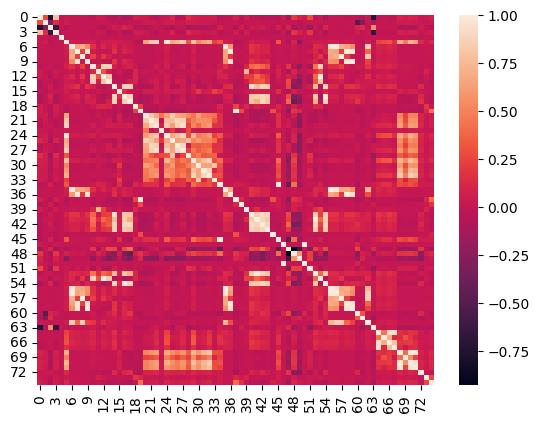

In [ ]:
sns.heatmap(scaled_data.corr())

In [ ]:
## 18 have eigen value greater than 1 and covers variance.  We will choose 18 as the ideal number of Principal components for our Analysis
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# Check the ideal K
We will Use K values from 4 to 9 to get the ideal value of K in this algorithm

In [ ]:
# 4 and 5, 6 7, 8
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
X=scaled_data
k_means_4 = KMeans(n_clusters=4)
model = k_means_4.fit(X)
y_hat_4 = k_means_4.predict(X)
labels_4 = k_means_4.labels_
print(metrics.silhouette_score(X, labels_4, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels_4))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X, labels_4)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.30321923187516464
50950.24208530084
1.544560657155246


In [ ]:
type(X)

pandas.core.frame.DataFrame

[2 2 2 ... 2 2 2]


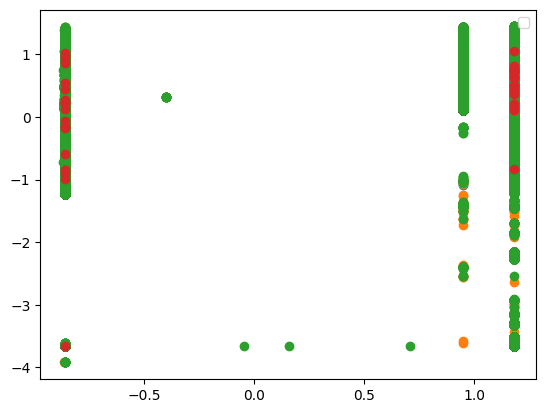

In [ ]:
kmeans_label = y_hat_4
df = X
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

K Means Cluster Analysis

## For the Overall Data

## Lets analyze the top 10 flows by applications 


## Lets analyze the top 10 flows by volume (Flow.Duration in Seconds * Flow bytes per second)


## Lets analyze the top 10 clients by session (Check which clients are chatty)

## Top 10 Clients per Volume (Check which applications are chatty)


## Same analysis per Clusters

## Final Analysis - Which parameters are most important for clustering
## Is the Clusters can be associated to a QOS
## Can the clusters be used for DPI tool
## Can the Clusters be used for Resource Allocation in Hardware
## Is the solution seamless for Encrypted Traffic
## Is the solution seamless for Encapsulated/DCN/Campus networks








In [ ]:
print("4 is the Ideal Cluster number")
import collections, numpy
overall_counter = collections.Counter(y_hat_4)

## Check How the Clusters are divided 
print(overall_counter)

4 is the Ideal Cluster number
Counter({2: 316182, 1: 64996, 0: 61264, 3: 41})


In [ ]:
## Analysis
 
print("Cluster Distribution")

print("cluster 0 % elements",317254*100/len(mydata))
print("cluster 1 % elements",64309*100/len(mydata))
print("cluster 2 % elements",60879*100/len(mydata))
print("cluster 3 % elements",41*100/len(mydata))

Cluster Distribution
cluster 0 % elements 71.6985737305162
cluster 1 % elements 14.533665700151193
cluster 2 % elements 13.758494676631644
cluster 3 % elements 0.009265892700962524


First 3 clusters only explains all the variations. We will treat Cluster 3 as Outliers and check what exactly it has
Before that Some analysis on the Original Data Set only.
Note that we have merged the Dataset based on Flow ID. Thereby multiple rows are merged to one

In [ ]:
## Top Sessions by L7 Protocol
print("Sessions by L7 Protocol")
overall_data_countrer_l7 = collections.Counter(mydata['L7Protocol'])
print(overall_data_countrer_l7)

Sessions by L7 Protocol
Counter({126.0: 105340, 91.0: 67033, 7.0: 58771, 131.0: 44478, 130.0: 25315, 124.0: 21629, 212.0: 10882, 178.0: 8399, 68.5: 8283, 69.0: 6217, 66.5: 6090, 147.0: 5727, 37.75: 4668, 70.0: 3688, 125.0: 3572, 38.0: 3099, 119.0: 3037, 36.75: 2975, 122.0: 2930, 120.0: 2494, 68.0: 2423, 220.0: 2256, 65.5: 1846, 48.0: 1763, 86.33333333333333: 1678, 121.0: 1674, 89.0: 1660, 48.333333333333336: 1481, 78.4: 1481, 46.666666666666664: 1409, 109.5: 1112, 40.0: 1021, 140.0: 964, 36.25: 958, 89.66666666666667: 919, 96.25: 783, 77.0: 773, 56.2: 744, 219.0: 725, 211.0: 614, 80.8: 613, 54.6: 608, 53.666666666666664: 582, 38.5: 558, 99.25: 532, 221.0: 447, 139.0: 412, 58.25: 408, 31.6: 399, 100.0: 369, 42.0: 355, 46.0: 354, 64.0: 344, 133.0: 344, 56.6: 339, 85.0: 335, 142.0: 333, 102.2: 321, 22.75: 307, 75.33333333333333: 306, 176.0: 290, 128.5: 283, 77.28571428571429: 279, 81.4: 277, 58.0: 258, 143.0: 253, 66.0: 253, 92.5: 248, 75.0: 227, 92.0: 216, 179.0: 210, 63.5: 206, 136.3333

In [ ]:
## Top Entries by Client IP
print("Session entries by Source IP")
overall_data_countrer_sip = collections.Counter(mydata['Source.IP'])
print(overall_data_countrer_sip)

Session entries by Source IP
Counter({180881369.0: 44674, 180881351.0: 39480, 180881347.0: 38069, 180881370.0: 37477, 180881346.0: 36596, 180881348.0: 33349, 180881159.0: 5086, 3232281614.0: 4465, 3232254040.0: 3361, 180881157.0: 3014, 3232258674.0: 2722, 3232258625.0: 2572, 3232253995.0: 2571, 3232238145.0: 2244, 3232281637.0: 2045, 180881160.0: 1967, 180881161.0: 1866, 3232253983.0: 1601, 3232245798.0: 1521, 3232238117.0: 1518, 180881158.0: 1500, 180881156.0: 1499, 2886926637.0: 1454, 3232281616.0: 1436, 2886926628.0: 1413, 3232238160.0: 1407, 2886926622.0: 1310, 3232254003.0: 1279, 3232238119.0: 1257, 3232274184.0: 1248, 182845752.0: 1182, 3232245802.0: 1170, 3232264206.0: 1140, 182845769.0: 1131, 3232281652.0: 1097, 3232268841.0: 1091, 3232246385.0: 1086, 3232258570.0: 1075, 3232274185.0: 1037, 3232256281.0: 1012, 3232258698.0: 971, 2886926627.0: 927, 3232245790.0: 926, 3232242985.0: 922, 3232268802.0: 903, 3232258590.0: 887, 3232248858.0: 872, 3232269075.0: 857, 3232246334.0: 857,

In [ ]:
# Top Entries my Destination IP
print("Session entries by Destination IP")
overall_data_countrer_dip = collections.Counter(mydata['Destination.IP'])
print(overall_data_countrer_dip)

Session entries by Destination IP
Counter({180881160.0: 35746, 180881157.0: 35205, 180881159.0: 34224, 180881156.0: 32976, 180881161.0: 31759, 180881158.0: 27756, 3488895158.0: 8282, 3003188434.0: 5374, 1750834412.0: 5358, 3003188455.0: 5070, 3003188468.0: 5049, 3003188440.0: 5016, 3003188461.0: 4850, 3003188454.0: 4820, 3003188441.0: 4770, 3003188475.0: 4743, 3003188469.0: 4701, 3003188462.0: 4673, 3003188448.0: 4544, 3003188447.0: 4537, 3232281637.0: 2757, 2899909953.0: 1837, 3627731682.0: 1648, 3627731681.0: 1561, 2899910146.0: 1466, 643490315.0: 1382, 3627736642.0: 1255, 2899910145.0: 1240, 225117234.0: 1223, 2899909922.0: 1204, 1089059517.0: 1113, 169084084.0: 1082, 643490316.0: 1069, 3589263173.0: 1065, 3627736674.0: 1015, 2899909954.0: 991, 225126923.0: 957, 643490317.0: 955, 3232274178.0: 947, 3232291845.0: 942, 1089060541.0: 932, 3627736673.0: 912, 1611073902.0: 865, 386478863.0: 833, 3627731690.0: 822, 2899910154.0: 743, 1168955503.0: 713, 3627736641.0: 672, 392336990.0: 640,

Create additional column for Volume in Bytes and Packets. These are useful as most sampled solutions provide this data

In [ ]:
## Get volume in the mydata. Volume in bytes = Duration in millisecod*bytes per seconds/100

mydata['volume_in_bytes_psec'] = mydata['Flow.Duration']*mydata['Flow.Bytes.s']/1000 
print(mydata['volume_in_bytes_psec'])
mydata['volume_in_packets_psec'] = mydata['Flow.Duration']*mydata['Flow.Packets.s']/1000 
print(mydata['volume_in_packets_psec'])
## Create Two Data Frames from the Original , one sorted with bytes and one sorted with packets

sorted_data_bytes = mydata.sort_values(by=['volume_in_bytes_psec'], ascending=False)
print(sorted_data_bytes)

sorted_data_packets = mydata.sort_values(by=['volume_in_packets_psec'], ascending=False)

0         2.337000e+06
1         1.398000e+06
2         3.892000e+06
3         3.475000e+06
4         1.774782e+07
              ...     
442478    2.084781e+07
442479    5.817757e+06
442480    2.718756e+06
442481    4.525014e+06
442482    1.321753e+06
Name: volume_in_bytes_psec, Length: 442483, dtype: float64
0         1.000000e+04
1         4.000000e+03
2         1.200000e+04
3         1.100000e+04
4         2.888500e+06
              ...     
442478    3.459495e+08
442479    8.317277e+08
442480    4.411331e+08
442481    3.310524e+08
442482    4.907189e+08
Name: volume_in_packets_psec, Length: 442483, dtype: float64
           Source.IP  Source.Port  Destination.IP  Destination.Port  Protocol  \
226160  3.232238e+09      51405.0    1.808812e+08            3128.0       6.0   
407778  1.808814e+08      55779.0    3.246174e+09              80.0       6.0   
437476  1.808814e+08      44592.0    3.627737e+09              80.0       6.0   
237997  3.232238e+09      52138.0    1.808812e+08 

In [ ]:
## Lets see the Top 10 guys based on Volume as to which App they belong

## Top 10 by Packets
print(sorted_data_packets[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].head(10))
## In the Top 10 results L4 Protocols and Destination Ports are typically same , we can remove one of them.  What impacts most , 
## Is there a particular client which is chatty or a particular application. 

## Top 10 entries by Volume in packets has mostly sent to Application 126 and 125 which are skype and google. Although SSL packets themselves was the
## highest

           Source.IP  Destination.IP  L7Protocol  Destination.Port  \
108436  1.808814e+08    2.539996e+09        91.0             443.0   
379928  3.232256e+09    1.808812e+08       125.0            3128.0   
266427  3.232272e+09    1.808812e+08       126.0            3128.0   
267507  3.232272e+09    1.808812e+08        77.0            3128.0   
97574   1.828459e+08    1.808812e+08       126.0            3128.0   
97577   1.828459e+08    1.808812e+08       126.0            3128.0   
97576   1.828459e+08    1.808812e+08       126.0            3128.0   
97575   1.828459e+08    1.808812e+08       126.0            3128.0   
97624   1.828459e+08    1.808812e+08       126.0            3128.0   
90284   1.808814e+08    1.541711e+09         7.0              80.0   

        volume_in_bytes_psec  Flow.Duration  
108436          1.930394e+12     39395801.0  
379928          1.290305e+13     59461046.5  
266427          5.273181e+11     58590596.5  
267507          5.147806e+11     42895491.5  

In [ ]:
sorted_data_duration = mydata.sort_values(by=['Flow.Duration'], ascending=False)
print(sorted_data_duration[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].head(20))
## Top 10 by Duration does not have 131 (Proxy), which means they are generally small duration. Large duration session were 126
## 211- Instagra 212- MS, 125- Skype , MSN


           Source.IP  Destination.IP  L7Protocol  Destination.Port  \
203225  1.808813e+08    3.003188e+09       126.0             443.0   
218528  1.808814e+08    3.193634e+09       211.0             443.0   
183313  1.808813e+08    3.003188e+09       126.0             443.0   
97584   1.828459e+08    1.808812e+08       126.0            3128.0   
337178  3.232246e+09    1.808812e+08        68.0            3128.0   
97925   1.828458e+08    1.808812e+08         7.0            3128.0   
17520   1.808813e+08    1.758470e+09       212.0             443.0   
309256  3.232244e+09    1.808812e+08       212.0            3128.0   
241279  3.232238e+09    1.808812e+08       126.0            3128.0   
20316   1.808813e+08    2.251171e+08       125.0             443.0   
280276  3.232282e+09    1.808812e+08       126.0            3128.0   
382661  3.232256e+09    1.808812e+08       126.0            3128.0   
93852   1.828459e+08    1.808812e+08       131.0            3128.0   
362566  3.232254e+09

Next we will take only a subset of parameters that we think is important and do K-Means based on them and check whether the results are similar

## This will be done in later part of analysis once base results are obtained with the original Data



In [ ]:

newmydata_bytes = mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].copy()
#newmydata_packets = mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_packets_psec','Flow.Duration']].copy()

We see the following patterns in the Original Dataframe
There are large size packets in a session
There are large duration sessions
There are small duration sessions
There are small size packets in a session
There are different applications - Video (Youtube , Skype , Google, MSN etc)
One client is more chatty then others.
Some client might be using some applications


Clusters Analyzed will be K-Means only. We would see in the 4 Clusters on what parameters that clusters are formed by comparing two clusters. 


In the second experiment , we will create the K-means without PCA and with only the 5-6 Columns and see the patterns in the Cluster.  This can be repeated with one or two more but we would conclude.


Optional - Hierarchical clsuters can be tried to see if the same pattern exist in the Clusters.

Fuzzy C Means will be experimented for the similar excercise to see if the results are same as till now very less results available for Fuzzy C-Means for IP FLow Classification



Recommendation will be based on the Results obtained with some domain knowledge added to it. 



In [ ]:
mydata['pLabel'] = y_hat_4

label0_df_kmeans = mydata.loc[mydata['pLabel'] == 0]
label0_df_kmeans

label1_df_kmeans = mydata.loc[mydata['pLabel'] == 1]
label1_df_kmeans

label2_df_kmeans = mydata.loc[mydata['pLabel'] == 2]
label2_df_kmeans

label3_df_kmeans = mydata.loc[mydata['pLabel'] == 3]
label3_df_kmeans




print(len(label0_df_kmeans))
print(len(label1_df_kmeans))
print(len(label2_df_kmeans))
print(len(label3_df_kmeans))

61264
64996
316182
41


## Calculation of weights of each column in the Cluster

THis will be repeated for all Clusters

This approach is model-agnostic; Not exclusive to K-Means, in which we convert the unsupervised clustering problem into a One-vs-All supervised classification problem using an easily interpretable classifier such as tree-based models. The steps to do this are as follows:

Change the cluster labels into One-vs-All binary labels for each
Train a classifier to discriminate between each cluster and all other clusters
Extract the feature importances from the model (We will be using sklearn.ensemble.RandomForestClassifier)

In [ ]:
mydata['pLabel']
mydata['Binary Cluster 0'] = mydata['pLabel'].map({0:0, 1:0, 2:1,3:0})
## Check what factor prompted Cluster 2 
## Cluster 1 2 and 3 are marked as 0 and 2 only as 1. We will repeat this step for other clusters as well

print("\n", mydata["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#clf.fit(mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

#clf.fit(mydata[['Source.IP', 'L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

mylist = list(mydata.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(mydata[mylist].values, mydata["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse 

print(sorted_feature_weight_idxes)
print(clf.feature_importances_)

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))



 1    316182
0    126301
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Flow.Duration', 0.09822126481265313),
 ('Fwd.IAT.Total', 0.0920914035410434),
 ('Packet.Length.Std', 0.08918767972248423),
 ('Max.Packet.Length', 0.0785367500801231),
 ('Packet.Length.Variance', 0.05610410489370726),
 ('Idle.Max', 0.05000696326491684),
 ('Average.Packet.Size', 0.04078461907551498),
 ('Bwd.Packet.Length.Mean', 0.039149300179029484),
 ('Bwd.Packet.Length.Max', 0.03853536744501611),
 ('Idle.Mean', 0.03751313954653708),
 ('Bwd.IAT.Total', 0.034958316342853804),
 ('Flow.IAT.Max', 0.02809741274972267),
 ('Avg.Bwd.Segment.Size', 0.02445820104157856),
 ('Packet.Length.Mean', 0.023851143953623897),
 ('Fwd.IAT.Max', 0.019769548250477588),
 ('Flow.IAT.Std', 0.018444394775235927),
 ('Bwd.Packet.Length.Std', 0.018167990664440338),
 ('Flow.IAT.Mean', 0.01716111109615115),
 ('Bwd.IAT.Max', 0.013420335209443248),
 ('Fwd.IAT.Mean', 0.012891290065083251),
 ('Idle.Min', 0.011053075597522308),
 ('Total.Length.of.Bwd.Packets', 0.010191533105064663),
 ('Fwd.IAT.Std', 0.010122214011204942

In [ ]:
## We will repeat this procedure for all the Clusters. Cluster 1

mydata['Binary Cluster 0'] = mydata['pLabel'].map({0:1, 1:0, 2:0,3:0})
print("\n", mydata["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(mydata.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(mydata[mylist].values, mydata["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    381219
1     61264
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Packet.Length.Std', 0.1499133942027727),
 ('Max.Packet.Length', 0.132496177736263),
 ('Packet.Length.Variance', 0.11107763441388205),
 ('Bwd.Packet.Length.Mean', 0.09121391372222261),
 ('Avg.Bwd.Segment.Size', 0.07658735747957465),
 ('Bwd.Packet.Length.Max', 0.06402404453774052),
 ('Packet.Length.Mean', 0.060357476641641025),
 ('Average.Packet.Size', 0.05903975291273189),
 ('Bwd.Packet.Length.Std', 0.034676527617006896),
 ('Total.Length.of.Bwd.Packets', 0.015624908638338389),
 ('Total.Fwd.Packets', 0.01237591107926376),
 ('Subflow.Bwd.Bytes', 0.010363213661896988),
 ('Avg.Fwd.Segment.Size', 0.00895056942362351),
 ('Idle.Max', 0.007316720169448059),
 ('Fwd.Packet.Length.Max', 0.00723987150591896),
 ('Subflow.Bwd.Packets', 0.007060418716012024),
 ('Fwd.Packet.Length.Mean', 0.007055579335198204),
 ('Bwd.IAT.Std', 0.00568627304368792),
 ('Idle.Mean', 0.00543920107556173),
 ('PSH.Flag.Count', 0.005311761299341427),
 ('Fwd.Packets.s', 0.005120686381418929),
 ('Flow.Packets.s', 0.004973509

In [ ]:
## Cluster 2
mydata['Binary Cluster 0'] = mydata['pLabel'].map({0:0, 1:1, 2:0,3:0})
print("\n", mydata["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(mydata.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(mydata[mylist].values, mydata["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    377487
1     64996
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Fwd.IAT.Total', 0.12014451582633993),
 ('Flow.Duration', 0.11947977074874477),
 ('Idle.Max', 0.07690219875505194),
 ('Flow.IAT.Max', 0.07172931377692268),
 ('Idle.Mean', 0.06507436737418215),
 ('Fwd.IAT.Mean', 0.05731847624489301),
 ('Flow.IAT.Std', 0.05614429593382156),
 ('Flow.IAT.Mean', 0.04514083056870862),
 ('Bwd.IAT.Std', 0.038660464818521235),
 ('Bwd.IAT.Total', 0.034421410953052255),
 ('Idle.Min', 0.03404385873413987),
 ('Bwd.IAT.Mean', 0.031609174878225704),
 ('Fwd.IAT.Std', 0.029708656669642876),
 ('Fwd.IAT.Max', 0.02735136902572473),
 ('Bwd.IAT.Max', 0.026442510442220426),
 ('Active.Max', 0.016588695750140936),
 ('Fwd.Packets.s', 0.01307355223866217),
 ('Flow.Packets.s', 0.011371594574154629),
 ('Active.Std', 0.010314170040679251),
 ('Idle.Std', 0.009376299499182148),
 ('Active.Mean', 0.008449996158044136),
 ('Average.Packet.Size', 0.006526651375665284),
 ('Packet.Length.Mean', 0.0057457020675163485),
 ('Avg.Bwd.Segment.Size', 0.004656316815446497),
 ('Max.Packet.Length',

In [ ]:
## Cluster 3
mydata['Binary Cluster 0'] = mydata['pLabel'].map({0:0, 1:0, 2:0,3:1})
print("\n", mydata["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(mydata.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(mydata[mylist].values, mydata["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    442442
1        41
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Subflow.Bwd.Packets', 0.1284370507100553),
 ('Fwd.Header.Length.1', 0.11829198885838756),
 ('Bwd.Header.Length', 0.10459682222670946),
 ('Fwd.Header.Length', 0.09494790415318294),
 ('Total.Fwd.Packets', 0.09432413197049887),
 ('Subflow.Fwd.Packets', 0.09108018808360113),
 ('Total.Backward.Packets', 0.06602370246828893),
 ('Total.Length.of.Bwd.Packets', 0.05479652675980994),
 ('Subflow.Bwd.Bytes', 0.05054126854286985),
 ('Subflow.Fwd.Bytes', 0.041927761426121125),
 ('act_data_pkt_fwd', 0.028116223290860307),
 ('Total.Length.of.Fwd.Packets', 0.02139600345185673),
 ('volume_in_bytes_psec', 0.0092595487603529),
 ('volume_in_packets_psec', 0.006831680969330317),
 ('Flow.Duration', 0.005743101162462506),
 ('Fwd.IAT.Mean', 0.005426938766239219),
 ('Avg.Fwd.Segment.Size', 0.004864415195058021),
 ('Fwd.Packets.s', 0.004385351624998516),
 ('Fwd.Packet.Length.Max', 0.004081697448759258),
 ('Flow.Packets.s', 0.004050403805558795),
 ('Flow.IAT.Max', 0.00358236689623733),
 ('Flow.Bytes.s', 0.0034

# FUZZY CMEANS CLUSTERING

In [ ]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [ ]:
X=scaled_data

In [ ]:
import numpy as np
from fcmeans import FCM
my_model = FCM(n_clusters=4) # we use the same 4 clusters
print(type(X))

arr = X.to_numpy()
#print(type(arr))
#print(arr)
#print(0)
my_model.fit(arr) ## X, numpy array. rows:samples columns:features
#print(1)
centers = my_model.centers
print(centers)
#print(2)
labels = my_model.predict(arr)
#print(3)
print(labels)

<class 'pandas.core.frame.DataFrame'>
[[ 7.10185605e-09 -2.34000582e-09 -6.09127003e-09  8.63519037e-09
   5.79587448e-10  4.65167493e-08  3.58405638e-09  3.49192683e-09
   1.42296337e-09  3.10570321e-09  1.93342277e-08  3.55835157e-09
   1.48323061e-08  1.87264057e-08  3.47155458e-08  3.92990586e-09
   3.59077923e-08  3.84242581e-08  3.41540222e-09  6.61557697e-09
   3.04370411e-08  3.87913938e-08  4.40966773e-08  3.14159931e-09
   4.49125935e-08  3.12729846e-08  3.67795587e-08  4.25634588e-08
   1.45864527e-08  3.62102191e-08  2.16904921e-08  3.02978946e-08
   3.52231578e-08  8.48774544e-09  1.88322352e-08  3.72378963e-09
   3.32115661e-09  6.35792331e-09  2.85689979e-09  1.94992159e-09
   3.66974236e-08  3.72452889e-08  4.21623064e-08  3.10495100e-08
   5.73797106e-09  1.88322352e-08  2.04001031e-09  1.33601320e-08
  -1.26354769e-08 -3.85825083e-08  2.02877494e-09  4.33296112e-09
   3.74912520e-08  1.48323062e-08  3.59077923e-08  3.72378963e-09
   3.58405638e-09  1.42296337e-09  3.4

In [ ]:
print(type(labels))

<class 'numpy.ndarray'>


In [ ]:
print(np. unique(labels))

[0 1 2 3]


In [ ]:
print(np.unique(labels, return_counts=True))

(array([0, 1, 2, 3]), array([     8,      7, 279652, 162816]))


In [ ]:
print(len(labels))

442483


In [ ]:
print((len(X)))

442483


In [ ]:
print(metrics.silhouette_score(X, labels, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels))

DB = davies_bouldin_score(X, labels)
print(DB)

-0.12235566796507621
13528.543188228088
2.6958292585558032


[2 2 2 ... 3 3 3]


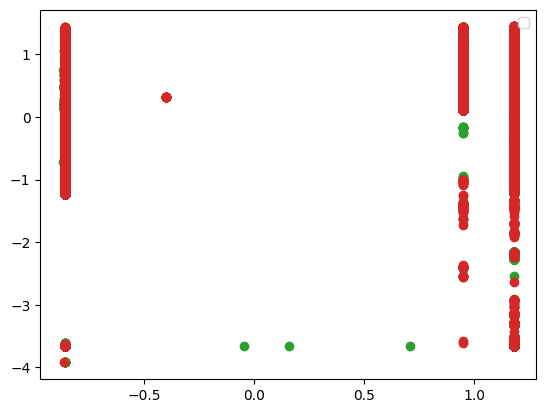

In [ ]:
kmeans_label = labels
df = X
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

[2 2 2 ... 3 3 3]


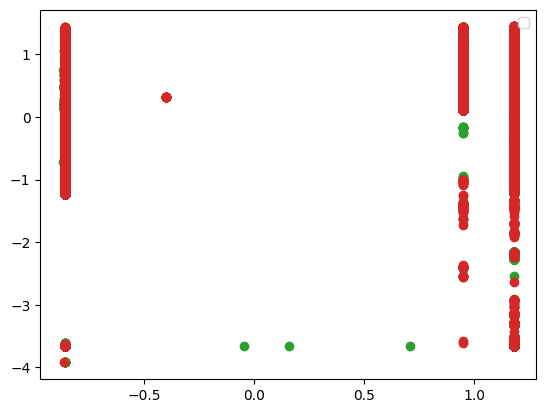

In [ ]:
fuzzy_kmeans_label = labels
df = X
print(fuzzy_kmeans_label)
u_labels = np.unique(fuzzy_kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[fuzzy_kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
## Lets find the Label Distrribution for Fuzzy K means 

In [ ]:
print(metrics.silhouette_score(X, fuzzy_kmeans_label, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, fuzzy_kmeans_label))

DB = davies_bouldin_score(X, fuzzy_kmeans_label)
print(DB)

0.23165271650768635
13528.543188228088
2.6958292585558032


In [ ]:
# Additional Analysis with the Labels
my_fuzzy_data = mydata
my_fuzzy_data['pLabel'] = fuzzy_kmeans_label

In [ ]:
## Allocate the labels back to the Data, compare on the labels between K-MEANS and Fuzzy-CMEANS
fuzzy_counter = collections.Counter(fuzzy_kmeans_label)

##>>> counter
##Counter({0: 7, 1: 4, 3: 2, 2: 1, 4: 1})
print(fuzzy_counter)

Counter({2: 279652, 3: 162816, 0: 8, 1: 7})


In [ ]:
label0_df_fuzzy_kmeans = my_fuzzy_data.loc[my_fuzzy_data['pLabel'] == 0]
label0_df_fuzzy_kmeans

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,volume_in_bytes_psec,volume_in_packets_psec,pLabel,Binary Cluster 0
67515,1.808814e+08,38215.0,6.330461e+08,443.0,6.0,6511879.5,103.5,221.0,2254.0,385871.0,...,1507815.0,4920895.0,0.0,4920895.0,4920895.0,91.0,1.965710e+08,222358.042046,0,0
108505,1.808814e+08,46076.0,2.560832e+09,443.0,6.0,10633528.0,17.0,11.0,1238.0,8136.0,...,0.0,0.0,0.0,0.0,0.0,91.0,9.374000e+06,28000.000001,0,0
218744,1.808814e+08,45297.0,3.219796e+09,443.0,6.0,5613302.0,10.0,5.0,416.0,5081.0,...,0.0,0.0,0.0,0.0,0.0,91.0,5.497000e+06,14999.999998,0,0
239083,3.232238e+09,52513.0,1.808812e+08,3128.0,6.0,2480745.0,7.0,9.0,560.0,5141.0,...,0.0,0.0,0.0,0.0,0.0,130.0,5.701000e+06,16000.000000,0,0
247708,3.232262e+09,63213.0,1.808812e+08,3128.0,6.0,315562.0,8.0,9.0,568.0,5758.0,...,0.0,0.0,0.0,0.0,0.0,130.0,6.326000e+06,17000.000000,0,0
302845,3.232292e+09,3201.0,1.808812e+08,3128.0,6.0,221952.0,8.0,16.5,5457.0,11681.0,...,0.0,0.0,0.0,0.0,0.0,131.0,1.154062e+07,506087.063913,0,0
313337,3.232244e+09,50819.0,1.808812e+08,3128.0,6.0,419303.0,19.0,31.0,1032.0,10000.0,...,0.0,0.0,0.0,0.0,0.0,130.0,1.103200e+07,49999.999996,0,0
435477,1.808813e+08,47590.0,3.627737e+09,443.0,6.0,1659060.0,23.0,19.0,931.0,17095.0,...,0.0,0.0,0.0,0.0,0.0,126.0,1.802600e+07,42000.000008,0,0


In [ ]:
label1_df_fuzzy_kmeans = my_fuzzy_data.loc[my_fuzzy_data['pLabel'] == 1]
label1_df_fuzzy_kmeans

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,volume_in_bytes_psec,volume_in_packets_psec,pLabel,Binary Cluster 0
8654,180881346.0,53177.0,6.761934e+08,443.0,6.0,1.051674e+06,8.000000,6.000000,1575.000000,4518.000000,...,0.0,0.0,0.0,0.0,0.0,91.00,6.093000e+06,1.400000e+04,1,0
14187,180881346.0,54243.0,1.249343e+09,443.0,6.0,4.372640e+05,7.000000,4.000000,586.000000,2971.000000,...,0.0,0.0,0.0,0.0,0.0,91.00,3.557000e+06,1.100000e+04,1,0
50840,180881351.0,41222.0,2.251269e+08,443.0,6.0,3.612040e+06,10.000000,7.000000,422.000000,5560.000000,...,0.0,0.0,0.0,0.0,0.0,91.00,5.982000e+06,1.700000e+04,1,0
66617,180881369.0,40425.0,3.864789e+08,443.0,6.0,5.810230e+05,17.000000,13.000000,960.000000,10353.000000,...,0.0,0.0,0.0,0.0,0.0,212.00,1.131300e+07,3.000000e+04,1,0
283948,180881159.0,3128.0,3.232282e+09,1722.0,6.0,1.340906e+05,20.000000,20.750000,16676.250000,19705.000000,...,0.0,0.0,0.0,0.0,0.0,69.25,6.645368e+08,1.636451e+06,1,0
370381,180881159.0,3128.0,3.232254e+09,1509.0,6.0,6.907073e+05,47.666667,44.333333,7270.666667,65380.333333,...,0.0,0.0,0.0,0.0,0.0,131.00,8.941841e+07,9.148076e+06,1,0
414685,180881369.0,43758.0,3.488895e+09,443.0,6.0,1.962170e+05,19.500000,20.500000,553.000000,26488.000000,...,0.0,0.0,0.0,0.0,0.0,91.00,4.618301e+07,5.330274e+04,1,0


In [ ]:
label2_df_fuzzy_kmeans = my_fuzzy_data.loc[my_fuzzy_data['pLabel'] == 2]
label2_df_fuzzy_kmeans

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,volume_in_bytes_psec,volume_in_packets_psec,pLabel,Binary Cluster 0
0,176294558.0,51072.0,180881160.0,3128.0,6.0,14842.0,4.0,6.0,165.0,2172.0,...,0.0,0.0,0.0,0.0,0.0,131.0,2.337000e+06,1.000000e+04,2,0
1,176294591.0,49585.0,180881158.0,3128.0,6.0,7466.0,4.0,0.0,1398.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,1.398000e+06,4.000000e+03,2,0
2,176294591.0,50603.0,180881159.0,3128.0,6.0,4906.0,5.0,7.0,338.0,3554.0,...,0.0,0.0,0.0,0.0,0.0,212.0,3.892000e+06,1.200000e+04,2,0
3,176294591.0,50604.0,180881159.0,3128.0,6.0,5585.0,5.0,6.0,306.0,3169.0,...,0.0,0.0,0.0,0.0,0.0,219.0,3.475000e+06,1.100000e+04,2,0
4,176294591.0,50605.0,180881159.0,3128.0,6.0,2886.0,3.5,2.5,170.5,699.0,...,0.0,0.0,0.0,0.0,0.0,113.0,1.774782e+07,2.888500e+06,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442471,180881370.0,50101.0,137054306.0,443.0,6.0,787624.0,11.5,11.0,6186.0,6096.5,...,0.0,0.0,0.0,0.0,0.0,91.0,6.497417e+06,2.049475e+04,2,0
442472,180881370.0,50102.0,137054306.0,443.0,6.0,769796.5,12.5,11.0,4787.0,5109.0,...,0.0,0.0,0.0,0.0,0.0,91.0,5.242942e+06,2.080867e+04,2,0
442473,180881370.0,50105.0,137054306.0,443.0,6.0,1435143.0,21.0,16.0,6908.0,8420.0,...,0.0,0.0,0.0,0.0,0.0,91.0,1.532800e+07,3.700000e+04,2,0
442475,180881370.0,50190.0,137054306.0,443.0,6.0,6692992.5,13.0,10.5,6129.0,5727.0,...,0.0,0.0,0.0,0.0,0.0,91.0,5.964803e+06,9.235568e+04,2,0


In [ ]:
label3_df_fuzzy_kmeans = my_fuzzy_data.loc[my_fuzzy_data['pLabel'] == 3]
label3_df_fuzzy_kmeans

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,volume_in_bytes_psec,volume_in_packets_psec,pLabel,Binary Cluster 0
44,176293152.0,49514.0,180881160.0,3128.0,6.0,4.702635e+06,6.000000,11.000000,453.000000,6330.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,131.000000,6.783000e+06,1.700000e+04,3,0
48,176293755.0,0.0,180881160.0,0.0,0.0,1.114399e+08,151.000000,299.857143,0.000000,0.0,...,4.765151e+06,5.081918e+06,7.159507e+05,5.922882e+06,4.514108e+06,102.000000,0.000000e+00,4.513519e+05,3,0
119,176294381.0,53765.0,180881160.0,3128.0,6.0,2.512899e+07,2.333333,5.666667,82.333333,2476.0,...,3.333333e-01,7.565174e+06,4.952447e+06,1.296813e+07,3.241116e+06,86.333333,1.023631e+11,1.675803e+10,3,0
154,176294381.0,53808.0,180881160.0,3128.0,6.0,2.073327e+06,5.000000,9.000000,243.000000,6330.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,126.000000,6.573000e+06,1.400000e+04,3,0
155,176294381.0,53809.0,180881160.0,3128.0,6.0,2.666885e+07,2.500000,8.500000,117.500000,3714.0,...,5.000000e-01,8.026546e+06,5.254593e+06,1.375981e+07,3.440028e+06,126.000000,1.476770e+09,4.289470e+06,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,180881370.0,54243.0,137054306.0,80.0,6.0,5.794110e+07,26.500000,40.500000,25602.500000,16093.0,...,7.408490e+05,2.705063e+07,0.000000e+00,2.705063e+07,2.705063e+07,7.000000,2.084781e+07,3.459495e+08,3,0
442479,180881370.0,54449.0,137054306.0,80.0,6.0,3.035765e+07,10.500000,14.000000,7446.000000,4189.5,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000,5.817757e+06,8.317277e+08,3,0
442480,180881370.0,54457.0,137054306.0,80.0,6.0,2.977613e+07,6.000000,6.500000,3702.000000,1735.5,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000,2.718756e+06,4.411331e+08,3,0
442481,180881370.0,56047.0,137054306.0,80.0,6.0,2.995961e+07,7.000000,9.000000,4796.000000,4254.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000,4.525014e+06,3.310524e+08,3,0


In [ ]:
## We will repeat this procedure for all the Clusters. Cluster 1

my_fuzzy_data['Binary Cluster 0'] = my_fuzzy_data['pLabel'].map({0:1, 1:0, 2:0,3:0})
print("\n", my_fuzzy_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(my_fuzzy_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(my_fuzzy_data[mylist].values, my_fuzzy_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    442475
1         8
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Average.Packet.Size', 0.04464281480202367),
 ('Source.Port', 0.036259521411033564),
 ('Bwd.Packet.Length.Std', 0.03201815717815379),
 ('Bwd.Packets.s', 0.031783045358658994),
 ('Packet.Length.Variance', 0.03121775388187783),
 ('Avg.Bwd.Segment.Size', 0.030850128505135226),
 ('Fwd.Packets.s', 0.029250134360054178),
 ('Flow.IAT.Mean', 0.028890661614421363),
 ('Bwd.Packet.Length.Mean', 0.028655840182433657),
 ('Fwd.Packet.Length.Mean', 0.027183659334772185),
 ('Fwd.IAT.Max', 0.026241750427339693),
 ('Flow.Packets.s', 0.024473729412413155),
 ('Fwd.Header.Length.1', 0.02434832830032623),
 ('Bwd.IAT.Mean', 0.024233860494126094),
 ('Fwd.IAT.Mean', 0.0236843695528498),
 ('Bwd.Packet.Length.Max', 0.022652751890053325),
 ('Fwd.Packet.Length.Std', 0.022346839159746036),
 ('Subflow.Bwd.Packets', 0.022010976694471655),
 ('Subflow.Fwd.Bytes', 0.021342442126411634),
 ('Packet.Length.Mean', 0.02111975624762106),
 ('volume_in_bytes_psec', 0.02064948947523205),
 ('Packet.Length.Std', 0.02028073124033

In [ ]:
## We will repeat this procedure for all the Clusters. Cluster 1

my_fuzzy_data['Binary Cluster 0'] = my_fuzzy_data['pLabel'].map({0:0, 1:1, 2:0,3:0})
print("\n", my_fuzzy_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(my_fuzzy_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(my_fuzzy_data[mylist].values, my_fuzzy_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    442476
1         7
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Packet.Length.Variance', 0.05304674945011374),
 ('Avg.Bwd.Segment.Size', 0.045517995130875635),
 ('Packet.Length.Std', 0.04190159684722014),
 ('Average.Packet.Size', 0.03822947071565109),
 ('Subflow.Fwd.Bytes', 0.0355129088295363),
 ('Fwd.IAT.Max', 0.02861397597076369),
 ('Bwd.Packet.Length.Max', 0.02723269825162452),
 ('Fwd.IAT.Std', 0.026703958498421367),
 ('Fwd.Packet.Length.Std', 0.02533345820495186),
 ('Flow.IAT.Std', 0.024422558161362046),
 ('volume_in_bytes_psec', 0.023683699758227643),
 ('Total.Length.of.Fwd.Packets', 0.022789031740098938),
 ('Flow.Duration', 0.02250175826483271),
 ('Subflow.Fwd.Packets', 0.022320666950916165),
 ('Flow.Bytes.s', 0.02137990564241523),
 ('Bwd.IAT.Std', 0.021027857127080975),
 ('Fwd.IAT.Total', 0.020873665691580286),
 ('Flow.IAT.Max', 0.01989275757555904),
 ('Bwd.Packet.Length.Mean', 0.019680462391288834),
 ('Bwd.Packet.Length.Std', 0.01961744807286296),
 ('Total.Length.of.Bwd.Packets', 0.019417462136715413),
 ('Packet.Length.Mean', 0.019212440

In [ ]:
my_fuzzy_data['Binary Cluster 0'] = my_fuzzy_data['pLabel'].map({0:0, 1:0, 2:1,3:0})
print("\n", my_fuzzy_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(my_fuzzy_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(my_fuzzy_data[mylist].values, my_fuzzy_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 1    279652
0    162831
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Fwd.IAT.Total', 0.09317020252265007),
 ('Packet.Length.Std', 0.09224079025260083),
 ('Flow.Duration', 0.08600012782882807),
 ('Max.Packet.Length', 0.0722629668446599),
 ('Flow.IAT.Max', 0.05827199199064314),
 ('Packet.Length.Variance', 0.04676361159774923),
 ('Average.Packet.Size', 0.043060667616786834),
 ('Bwd.Packet.Length.Max', 0.03815499559520011),
 ('Idle.Mean', 0.03282918319333489),
 ('Packet.Length.Mean', 0.03236957770238583),
 ('Flow.IAT.Std', 0.03142496829371567),
 ('Idle.Max', 0.03123433652826833),
 ('Fwd.IAT.Max', 0.029053431446709962),
 ('Bwd.Packet.Length.Mean', 0.028767140065578872),
 ('Bwd.Packet.Length.Std', 0.021449984038145777),
 ('Bwd.IAT.Total', 0.017762454840251796),
 ('Flow.IAT.Mean', 0.01720021964493789),
 ('Fwd.IAT.Std', 0.016717582110984716),
 ('Fwd.IAT.Mean', 0.01590564465628564),
 ('Active.Max', 0.013978674453396994),
 ('Flow.Packets.s', 0.009473660170125393),
 ('Total.Length.of.Bwd.Packets', 0.008560268462270601),
 ('Avg.Bwd.Segment.Size', 0.0084388814542

In [ ]:
my_fuzzy_data['Binary Cluster 0'] = my_fuzzy_data['pLabel'].map({0:0, 1:0, 2:0,3:1})
print("\n", my_fuzzy_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(my_fuzzy_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(my_fuzzy_data[mylist].values, my_fuzzy_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    279667
1    162816
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Fwd.IAT.Total', 0.09301206015434335),
 ('Flow.Duration', 0.08771100926926106),
 ('Packet.Length.Std', 0.08461870351269761),
 ('Max.Packet.Length', 0.07367008024211079),
 ('Flow.IAT.Max', 0.05877039278001774),
 ('Packet.Length.Variance', 0.0471463900288551),
 ('Average.Packet.Size', 0.04346671073622854),
 ('Bwd.Packet.Length.Max', 0.039528037768180126),
 ('Idle.Mean', 0.033320451473409785),
 ('Flow.IAT.Std', 0.03129744888194831),
 ('Idle.Max', 0.03025221383333442),
 ('Packet.Length.Mean', 0.02968516909419053),
 ('Bwd.Packet.Length.Mean', 0.02835489116620563),
 ('Fwd.IAT.Max', 0.027761840442505112),
 ('Bwd.Packet.Length.Std', 0.021688882995026085),
 ('Fwd.IAT.Std', 0.01708491401781719),
 ('Flow.IAT.Mean', 0.016734314355890966),
 ('Bwd.IAT.Total', 0.016416992943827955),
 ('Fwd.IAT.Mean', 0.014855139273249001),
 ('Active.Max', 0.013453966817555833),
 ('Avg.Bwd.Segment.Size', 0.01244265388654891),
 ('Flow.Packets.s', 0.010001443534359578),
 ('Fwd.Packets.s', 0.009465484880349451),
 ('URG

## DB Scan
## Wherever we have taken 20000 etc is because of memory limitation , will change after moving to collab

In [ ]:
## Use Standard Scaler to Scale the Data
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(mydata.head(20000))) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,-9.801970,0.555117,-1.581676,1.944833,0.002456,-0.565269,-0.067271,-0.060138,-0.035092,-0.063574,...,-0.111518,-0.280793,-0.133718,-0.286979,-0.269405,0.733129,-0.084147,-0.126186,-0.777574,-0.778071
1,-9.801899,0.367726,-1.581676,1.944833,0.002456,-0.565578,-0.067271,-0.071892,-0.025697,-0.065385,...,-0.111518,-0.280793,-0.133718,-0.286979,-0.269405,-1.181627,-0.084195,-0.126188,-0.777574,-0.778071
2,-9.801899,0.496014,-1.581676,1.944833,0.002456,-0.565685,-0.064406,-0.058179,-0.033773,-0.062421,...,-0.111518,-0.280793,-0.133718,-0.286979,-0.269405,1.983897,-0.084069,-0.126185,-0.777574,-0.778071
3,-9.801899,0.496140,-1.581676,1.944833,0.002456,-0.565657,-0.064406,-0.060138,-0.034017,-0.062742,...,-0.111518,-0.280793,-0.133718,-0.286979,-0.269405,2.091989,-0.084090,-0.126185,-0.777574,-0.778071
4,-9.801899,0.496266,-1.581676,1.944833,0.002456,-0.565770,-0.068704,-0.066995,-0.035050,-0.064802,...,-0.111518,-0.280793,-0.133718,-0.286979,-0.269405,0.455181,-0.083370,-0.124989,-0.777574,-0.778071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.102094,1.200591,1.202961,-0.098189,0.002456,2.011308,-0.050078,-0.058179,-0.032966,-0.061138,...,-0.111518,-0.280793,-0.133718,-0.286979,-0.269405,0.115466,-0.083986,-0.126183,1.284957,1.285230
19996,0.102094,1.200717,1.202961,-0.098189,0.002456,2.963945,-0.009961,-0.028792,-0.021666,-0.060006,...,-0.111518,-0.280793,-0.133718,-0.286979,-0.269405,0.115466,-0.083842,-0.126171,1.284957,1.285230
19997,0.102094,1.252889,1.202961,-0.098189,0.002456,-0.322638,-0.058675,-0.064056,-0.030886,-0.065317,...,-0.111518,-0.280793,-0.133718,-0.286979,-0.269405,0.115466,-0.084225,-0.126185,-0.777574,-0.778071
19998,0.102094,1.305565,1.202961,-0.098189,0.002456,-0.396899,-0.032885,-0.046424,-0.019045,-0.064499,...,-0.111518,-0.280793,-0.133718,-0.286979,-0.269405,0.115466,-0.084097,-0.126178,-0.777574,-0.778071


In [ ]:
from sklearn.cluster import DBSCAN
#db=DBSCAN(eps=30,min_samples=6)

db = DBSCAN(eps=5,min_samples=10)
X1 = scaled_data
db.fit(X1)


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
dbscan_labels = len(labels)
dbscan_label_vals = labels

print('overall elements : %d' % len(labels))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X.head(20000), labels))

overall elements : 20000
Estimated number of clusters: 18
Estimated number of noise points: 685
Silhouette Coefficient: -0.078


9 is too high. Will try the hyperparameters more

In [ ]:


print("herabasz",metrics.calinski_harabasz_score(X1, labels))

DB = davies_bouldin_score(X1, labels)
print("Davies-build-in",DB)

herabasz 191.56053393894257
Davies-build-in 1.3021518241231331


[0 0 0 ... 2 2 2]


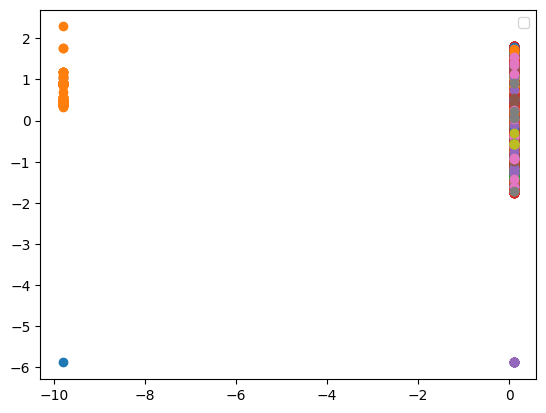

In [ ]:
kmeans_label = labels
df = X1
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
## Use Standard Scaler to Scale the Data
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(mydata)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,-0.864318,0.260207,-0.888809,0.908762,-0.011004,-0.615518,-0.062263,-0.054776,-0.024997,-0.046479,...,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,0.638001,-0.051726,-0.154444,-0.762691,-0.763006
1,-0.864318,0.138412,-0.888809,0.908762,-0.011004,-0.615820,-0.062263,-0.062112,-0.023776,-0.047617,...,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051733,-0.154446,-0.762691,-0.763006
2,-0.864318,0.221793,-0.888809,0.908762,-0.011004,-0.615924,-0.060754,-0.053553,-0.024826,-0.045754,...,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,2.292895,-0.051715,-0.154443,-0.762691,-0.763006
3,-0.864318,0.221875,-0.888809,0.908762,-0.011004,-0.615896,-0.060754,-0.054776,-0.024858,-0.045956,...,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,2.435910,-0.051718,-0.154443,-0.762691,-0.763006
4,-0.864318,0.221957,-0.888809,0.908762,-0.011004,-0.616006,-0.063017,-0.059055,-0.024992,-0.047250,...,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,0.270247,-0.051613,-0.153553,-0.762691,-0.763006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,-0.861252,0.519933,-0.921801,-1.005425,-0.011004,1.748831,-0.028324,-0.012590,0.000204,-0.039184,...,0.519740,1.998755,-0.242574,1.801023,2.188724,-1.895416,-0.051590,-0.047418,1.310358,1.310606
442479,-0.861252,0.536805,-0.921801,-1.005425,-0.011004,0.622970,-0.052458,-0.044993,-0.017784,-0.045421,...,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051701,0.102870,1.310358,1.310606
442480,-0.861252,0.537461,-0.921801,-1.005425,-0.011004,0.599234,-0.059246,-0.054164,-0.021493,-0.046707,...,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051723,-0.017971,1.310358,1.310606
442481,-0.861252,0.667692,-0.921801,-1.005425,-0.011004,0.606723,-0.057738,-0.051107,-0.020409,-0.045388,...,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051710,-0.052027,1.310358,1.310606


In [ ]:
from sklearn.cluster import DBSCAN
#db=DBSCAN(eps=30,min_samples=6)

db = DBSCAN(eps=5,min_samples=21)
X1 = scaled_data.head(20000)
db.fit(X1)


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X.head(20000), labels))

Estimated number of clusters: 3
Estimated number of noise points: 964
Silhouette Coefficient: 0.462


3 is OK. Our analysis will be done based on 3 Clusters

In [ ]:

#print("Silhouette:",metrics.silhouette_score(X1, labels, metric = 'euclidean',sample_size=50000))
print("herabasz",metrics.calinski_harabasz_score(X1, labels))

DB = davies_bouldin_score(X1, labels)
print("Davies-build-in",DB)

herabasz 573.6940959185084
Davies-build-in 1.9249475779785152


In [ ]:
u_labels = np.unique(labels) 
u_labels



array([-1,  0,  1,  2])

In [ ]:
dbscan_counter = collections.Counter(labels)
print(dbscan_counter)

Counter({0: 18995, -1: 964, 1: 21, 2: 20})


[0 0 0 ... 0 0 0]


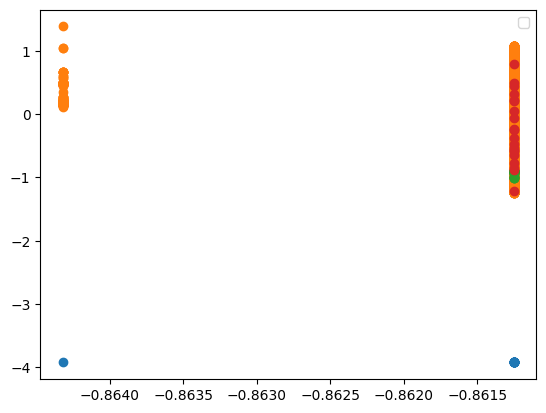

In [ ]:
dbscan_label = labels
df = X1
print(dbscan_label)
u_labels = np.unique(dbscan_label) 



dbscan_labels = len(labels)
dbscan_label_vals = labels

#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[dbscan_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
print(u_labels)

[-1  0  1  2]


In [ ]:
dbscan_data = mydata.head(20000)
dbscan_data['pLabel'] = dbscan_label_vals
dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:1, 0:0, 1:0, 2:0})
print("\n", dbscan_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(dbscan_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(dbscan_data[mylist].values, dbscan_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    19036
1      964
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', '

<ipython-input-97-6ce7c20a048d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['pLabel'] = dbscan_label_vals
<ipython-input-97-6ce7c20a048d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:1, 0:0, 1:0, 2:0})


[('Active.Max', 0.0580661450403628),
 ('Bwd.IAT.Total', 0.04652688488438971),
 ('Idle.Max', 0.045014381559899945),
 ('Active.Mean', 0.042081757321416315),
 ('Flow.Duration', 0.0414972490236589),
 ('Idle.Mean', 0.038026778858939785),
 ('Fwd.IAT.Total', 0.026608849298085522),
 ('Idle.Std', 0.024079602036766675),
 ('Active.Min', 0.02322545991724678),
 ('Fwd.PSH.Flags', 0.022167518962241495),
 ('Idle.Min', 0.021880710829540063),
 ('volume_in_packets_psec', 0.020722822369863877),
 ('Bwd.IAT.Max', 0.019107568906534252),
 ('Flow.IAT.Std', 0.018778587197707322),
 ('Fwd.Packet.Length.Mean', 0.01820264993932663),
 ('Packet.Length.Mean', 0.01814395862081236),
 ('Flow.IAT.Mean', 0.018011832605649633),
 ('Avg.Fwd.Segment.Size', 0.01720588657905559),
 ('PSH.Flag.Count', 0.0168069209325872),
 ('SYN.Flag.Count', 0.016098861024230592),
 ('Bwd.IAT.Mean', 0.015979123721871265),
 ('Average.Packet.Size', 0.014767461761919278),
 ('Init_Win_bytes_forward', 0.01461542274761299),
 ('Packet.Length.Std', 0.01458

In [ ]:
dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0,0:1, 1:0, 2:0})
print("\n", dbscan_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(dbscan_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(dbscan_data[mylist].values, dbscan_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

<ipython-input-98-aabc3aa58017>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0,0:1, 1:0, 2:0})



 1    18995
0     1005
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', '

[('Active.Max', 0.06356123508233245),
 ('Bwd.IAT.Total', 0.047677557375088796),
 ('Active.Mean', 0.04654766026545423),
 ('Flow.Duration', 0.041173365760088454),
 ('Idle.Max', 0.03876648058519262),
 ('Idle.Mean', 0.036810533369027114),
 ('Active.Min', 0.03533249338782615),
 ('Bwd.Packets.s', 0.03465222200414823),
 ('Fwd.IAT.Total', 0.02512315133409695),
 ('Idle.Min', 0.02420748403662228),
 ('Idle.Std', 0.02392614355566195),
 ('Fwd.PSH.Flags', 0.020145275644895228),
 ('Fwd.Packet.Length.Mean', 0.019621463571827213),
 ('volume_in_packets_psec', 0.017896487980220515),
 ('Average.Packet.Size', 0.017684288252912458),
 ('Bwd.IAT.Max', 0.016548767973165998),
 ('PSH.Flag.Count', 0.016412931659112343),
 ('Flow.IAT.Mean', 0.01630998460716338),
 ('Flow.IAT.Std', 0.016172887135055915),
 ('Init_Win_bytes_forward', 0.01597409586203243),
 ('SYN.Flag.Count', 0.014700981824452456),
 ('Bwd.IAT.Mean', 0.014240474573555234),
 ('Avg.Fwd.Segment.Size', 0.014166691405431975),
 ('Packet.Length.Mean', 0.0138308

In [ ]:
dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0,0:0, 1:1, 2:1})
print("\n", dbscan_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(dbscan_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(dbscan_data[mylist].values, dbscan_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

<ipython-input-99-aa62dc0ba0e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0,0:0, 1:1, 2:1})



 0    19959
1       41
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', '

[('Bwd.Packets.s', 0.16507627306959505),
 ('Active.Mean', 0.045570800307885836),
 ('Active.Min', 0.04191321207616968),
 ('Fwd.Packets.s', 0.03585799796830701),
 ('Subflow.Fwd.Bytes', 0.035089229257033776),
 ('Subflow.Bwd.Packets', 0.02468913427175778),
 ('volume_in_packets_psec', 0.02298052163513602),
 ('Active.Max', 0.02258528074854051),
 ('Avg.Fwd.Segment.Size', 0.022238826709020002),
 ('Fwd.IAT.Total', 0.02212890170846223),
 ('Flow.Packets.s', 0.02206230916189463),
 ('volume_in_bytes_psec', 0.02200699231768871),
 ('Total.Length.of.Fwd.Packets', 0.021475976801512673),
 ('Flow.Duration', 0.01955629638298331),
 ('Bwd.IAT.Total', 0.019065338207460383),
 ('Bwd.Header.Length', 0.018710723528100954),
 ('Total.Backward.Packets', 0.0181192223597014),
 ('L7Protocol', 0.016561146920606538),
 ('Init_Win_bytes_backward', 0.01630128254847883),
 ('Fwd.IAT.Std', 0.01604132565602125),
 ('Total.Fwd.Packets', 0.016038812039959216),
 ('act_data_pkt_fwd', 0.015350639382173844),
 ('URG.Flag.Count', 0.015

In [ ]:
dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0,0:0, 1:0, 2:1})
print("\n", dbscan_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(dbscan_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(dbscan_data[mylist].values, dbscan_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

<ipython-input-100-5e2ba37c3b85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0,0:0, 1:0, 2:1})



 0    19980
1       20
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', '

[('Bwd.Packets.s', 0.24725540035059215),
 ('Fwd.Packets.s', 0.09753187182154387),
 ('volume_in_packets_psec', 0.04608519783214936),
 ('Flow.Packets.s', 0.04546671568485062),
 ('Bwd.IAT.Total', 0.032670050519163725),
 ('volume_in_bytes_psec', 0.028456215340993914),
 ('Bwd.IAT.Mean', 0.026263117141432438),
 ('Bwd.IAT.Std', 0.025597243002584338),
 ('Flow.IAT.Mean', 0.025484596602429743),
 ('Init_Win_bytes_backward', 0.024036856318130604),
 ('Destination.Port', 0.023637146025167435),
 ('Down.Up.Ratio', 0.022936272911358725),
 ('Bwd.IAT.Max', 0.01765687962944497),
 ('Destination.IP', 0.01743997399237206),
 ('Subflow.Fwd.Packets', 0.015796634918085573),
 ('Flow.Duration', 0.015374914049662115),
 ('Flow.IAT.Std', 0.014789485492261117),
 ('L7Protocol', 0.013680419510126853),
 ('Fwd.IAT.Max', 0.013390053915805325),
 ('Bwd.IAT.Min', 0.012762346830314448),
 ('Average.Packet.Size', 0.012245394702595962),
 ('URG.Flag.Count', 0.011938463682745547),
 ('Bwd.Header.Length', 0.0118070119872008),
 ('Flow